In [49]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

Let's clean our data up some. We will merge the Information, Publishers, and Developers csv's into a single dataframe, then get rid of our NaN entries, empty columns, and Free-to-Play games. This leaves us with ~1250 entries out of our original 2000.

In [31]:
publisherColumns = ['appid','publisher']
developerColumns = ['appid','developer']

#read in data, skip bad lines
appInformation = pd.read_csv('data/applicationInformation.csv',encoding='utf-8')
appDevelopers = pd.read_csv('data/applicationDevelopers.csv',encoding='utf-8',names=developerColumns,on_bad_lines='skip')
appPublishers = pd.read_csv('data/applicationPublishers.csv',encoding='utf-8',names=publisherColumns,on_bad_lines='skip')

#merge data
appMergedInfo = appInformation.merge(appDevelopers, on='appid').merge(appPublishers, on='appid')

#remove non-games, remove FTP, remove NaN, export to csv for checking
appMergedInfo = appMergedInfo[appMergedInfo['type'] == 'game']
appMergedInfo = appMergedInfo[appMergedInfo['freetoplay'] == 0] 
appMergedInfo.dropna(axis=0,how='any',inplace=True) 
appMergedInfo.to_csv('merged_info.csv',index=False) 

Now let's take our Player Count History csv's and normalize them to 1-day intervals so that we can easily plot/graph the features over time. Daily player counts are averaged over the whole day. The output for each Normalized Player Count History is in data/NormalizedPlayerCountHistory/{appid}.csv


NOTE: This cell takes up to 15-18 minutes to run in it's entirety. It processes and normalizes 2000 files so it takes a while. I was too lazy to parallelize the file processing.

In [56]:
#THIS TAKES A SUPER LONG TIME TO RUN, LIKE 16 MINS

# Directory paths for PlayerCountHistory
playerCountDir = ["data/PlayerCountHistoryPart1/","data/PlayerCountHistoryPart2/"]

# Loop through CSV files in the directory
nFiles = 0
for dir in playerCountDir:
    for filename in os.listdir(dir):
        if filename.endswith(".csv"):
            nFiles = nFiles+1
            filePath = os.path.join(dir, filename)
            appid = os.path.splitext(filename)[0]  # Extract the app id from the filename
            data = pd.read_csv(filePath, parse_dates=['Time'], index_col='Time')
            print(filePath) #for tracking status
            
            # Resample the data to 1-day intervals and calculate the daily average player count (int)
            dailyAveragePlayerCount = data.resample('1D').mean()
            dailyAveragePlayerCount['Playercount'] = dailyAveragePlayerCount['Playercount'].fillna(-1).astype(int)

            #store in new dataframe to rename "Time" column to "Date" (theres probably an easier way but this works)
            resultDF = pd.DataFrame({'Date': dailyAveragePlayerCount.index, 'Playercount': dailyAveragePlayerCount['Playercount']})

            # Store in CSV
            resultDF.to_csv(f"data/NormalizedPlayerCountHistory/{appid}.csv", index=False)
print(f"{nFiles}" + " csv files normalized to 1-day intervals with average players per day. Stored in NormalizedPlayerCountHistory. Organized by appid.")

data/PlayerCountHistoryPart1/10.csv
data/PlayerCountHistoryPart1/10090.csv
data/PlayerCountHistoryPart1/10180.csv
data/PlayerCountHistoryPart1/10190.csv
data/PlayerCountHistoryPart1/10270.csv
data/PlayerCountHistoryPart1/104900.csv
data/PlayerCountHistoryPart1/10500.csv
data/PlayerCountHistoryPart1/105450.csv


KeyboardInterrupt: 

Now let's go through each appid in our MergedInfo dataframe and for each of them, plot the price and player count over time to check for correlations. We can change the values plotted to see different features (will streamline this soon)


NOTE: Will take a very long time to generate every single graph, I have yet to run it in it's entirety

           Date  Initialprice  Finalprice  Discount  Playercount
0    2019-04-07         29.99       29.99         0       468782
1    2019-04-08         29.99       29.99         0       383311
2    2019-04-09         29.99       29.99         0       389990
3    2019-04-10         29.99       29.99         0       348582
4    2019-04-11         29.99       29.99         0       382034
..          ...           ...         ...       ...          ...
488  2020-08-08         29.99       29.99         0       217752
489  2020-08-09         29.99       29.99         0       220377
490  2020-08-10         29.99       29.99         0       191059
491  2020-08-11         29.99       29.99         0       187966
492  2020-08-12         29.99       29.99         0       188513

[493 rows x 5 columns]


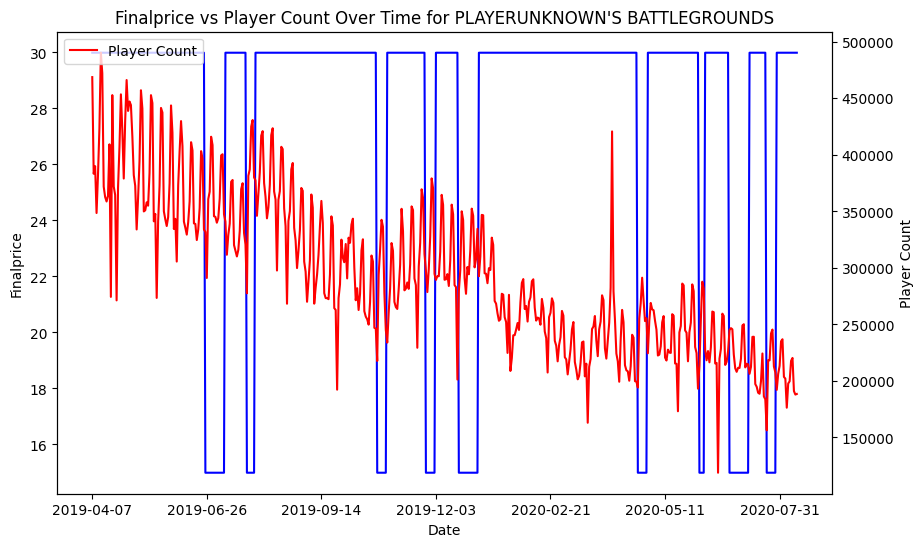

           Date  Initialprice  Finalprice  Discount  Playercount
0    2019-04-07         19.99       10.99        45        79583
1    2019-04-08         19.99       19.99         0        58024
2    2019-04-09         19.99       19.99         0        53842
3    2019-04-10         19.99       19.99         0        55408
4    2019-04-11         19.99       19.99         0        55468
..          ...           ...         ...       ...          ...
488  2020-08-08         19.99       19.99         0        69201
489  2020-08-09         19.99       19.99         0        70212
490  2020-08-10         19.99       19.99         0        65869
491  2020-08-11         19.99       19.99         0        62582
492  2020-08-12         19.99       19.99         0        67265

[493 rows x 5 columns]


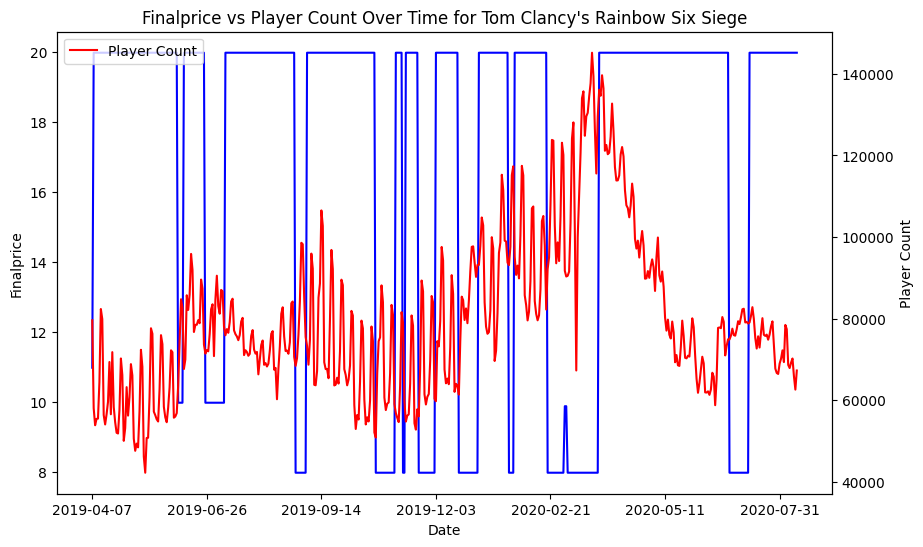

           Date  Initialprice  Finalprice  Discount  Playercount
0    2019-04-07         29.99       29.99         0        62208
1    2019-04-08         29.99       29.99         0        45277
2    2019-04-09         29.99       29.99         0        44973
3    2019-04-10         29.99       29.99         0        44638
4    2019-04-11         29.99       29.99         0        44040
..          ...           ...         ...       ...          ...
488  2020-08-08         29.99       14.99        50        82208
489  2020-08-09         29.99       14.99        50        86658
490  2020-08-10         29.99       14.99        50        81476
491  2020-08-11         29.99       14.99        50        93847
492  2020-08-12         29.99       14.99        50        96512

[493 rows x 5 columns]


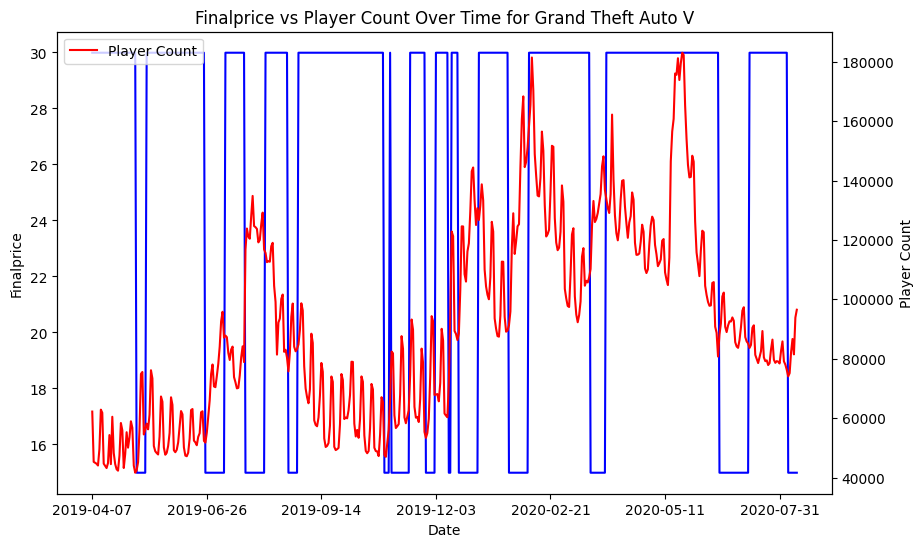

           Date  Initialprice  Finalprice  Discount  Playercount
0    2019-04-07         19.99       19.99         0        34680
1    2019-04-08         19.99       19.99         0        27695
2    2019-04-09         19.99       19.99         0        27495
3    2019-04-10         19.99       19.99         0        27710
4    2019-04-11         19.99       19.99         0        28407
..          ...           ...         ...       ...          ...
488  2020-08-08         19.99       19.99         0        40436
489  2020-08-09         19.99       19.99         0        41941
490  2020-08-10         19.99       19.99         0        40137
491  2020-08-11         19.99       19.99         0        39685
492  2020-08-12         19.99       19.99         0        38930

[493 rows x 5 columns]


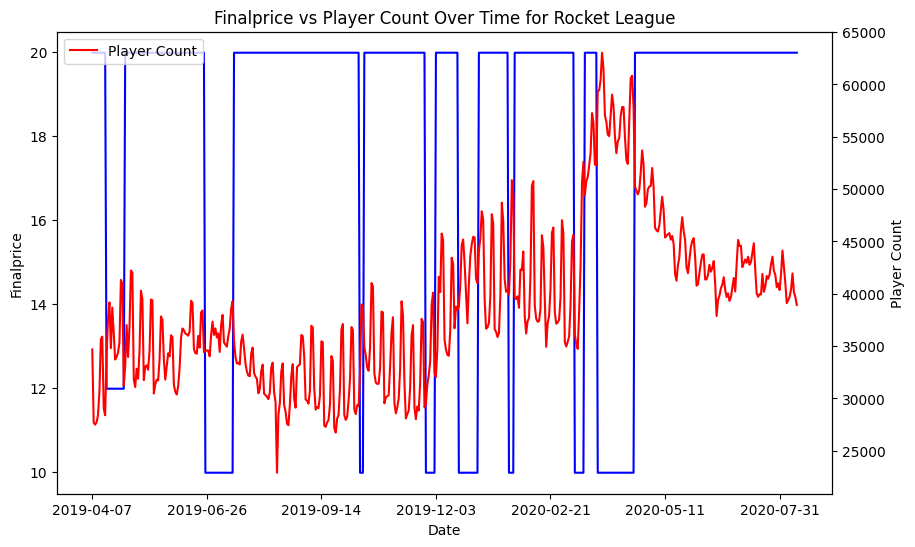

           Date  Initialprice  Finalprice  Discount  Playercount
0    2019-04-07         34.99       34.99         0        54966
1    2019-04-08         34.99       34.99         0        40129
2    2019-04-09         34.99       34.99         0        37769
3    2019-04-10         34.99       34.99         0        35027
4    2019-04-11         34.99       34.99         0        36497
..          ...           ...         ...       ...          ...
488  2020-08-08         39.99       39.99         0        65639
489  2020-08-09         39.99       39.99         0        64219
490  2020-08-10         39.99       39.99         0        59305
491  2020-08-11         39.99       39.99         0        56552
492  2020-08-12         39.99       39.99         0        52924

[493 rows x 5 columns]


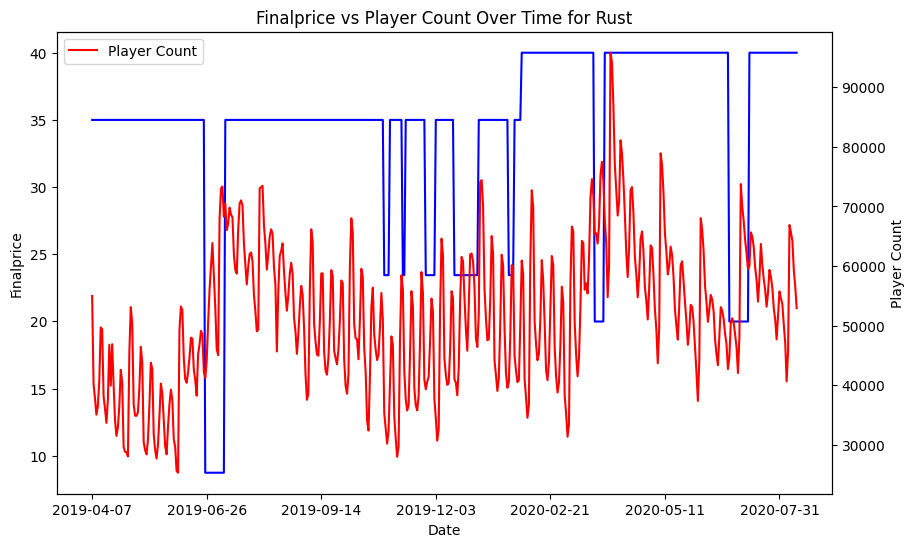

          Date  Initialprice  Finalprice  Discount  Playercount
0   2019-04-07         49.99       49.99         0         9233
1   2019-04-08         49.99       49.99         0         7304
2   2019-04-09         49.99       49.99         0         7205
3   2019-04-10         49.99       49.99         0         7111
4   2019-04-11         49.99       49.99         0         7111
..         ...           ...         ...       ...          ...
67  2019-06-13         49.99       49.99         0         7063
68  2019-06-14         49.99       49.99         0         7131
69  2019-06-15         49.99       49.99         0         8492
70  2019-06-16         49.99       49.99         0         8795
71  2019-06-17         49.99       49.99         0         7169

[72 rows x 5 columns]


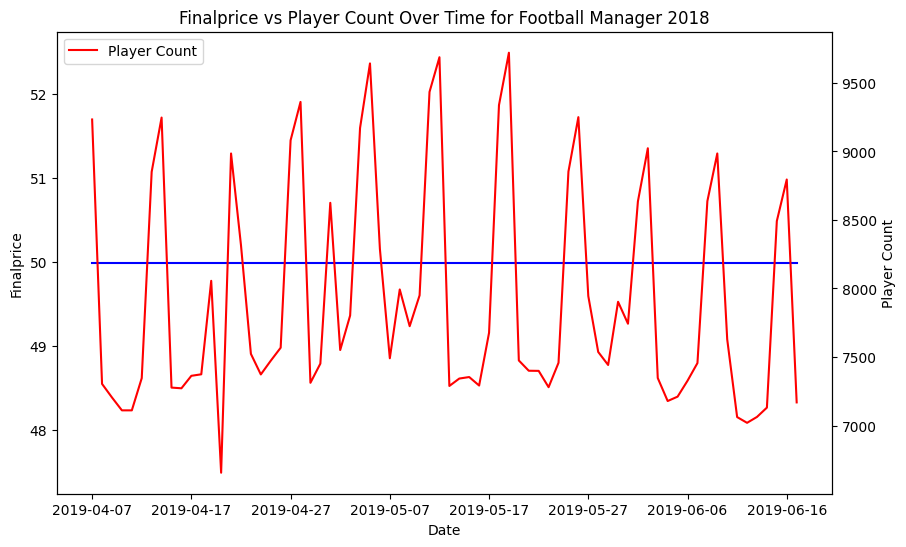

           Date  Initialprice  Finalprice  Discount  Playercount
0    2019-04-07          9.99        9.99         0        32174
1    2019-04-08          9.99        9.99         0        22350
2    2019-04-09          9.99        9.99         0        21987
3    2019-04-10          9.99        9.99         0        22166
4    2019-04-11          9.99        9.99         0        22094
..          ...           ...         ...       ...          ...
488  2020-08-08          9.99        9.99         0        27494
489  2020-08-09          9.99        9.99         0        27984
490  2020-08-10          9.99        9.99         0        28096
491  2020-08-11          9.99        9.99         0        27868
492  2020-08-12          9.99        9.99         0        27282

[493 rows x 5 columns]


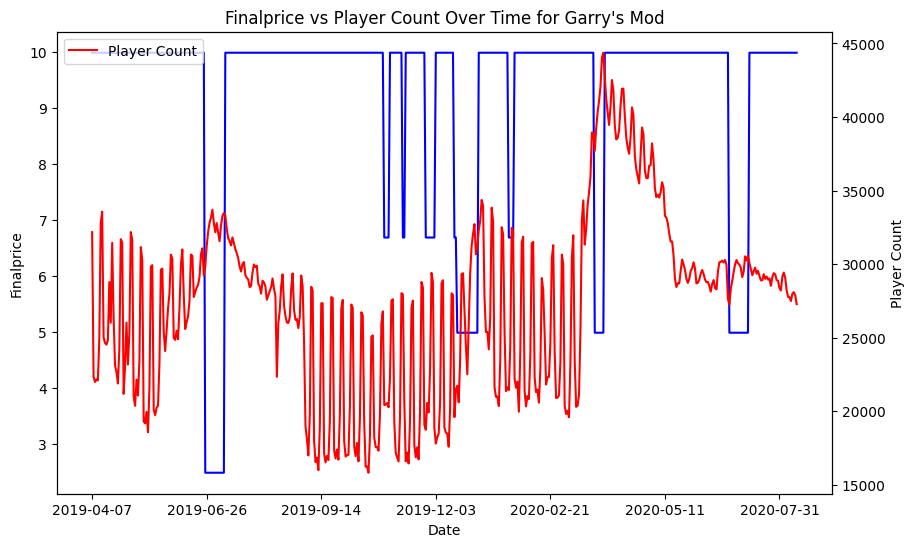

           Date  Initialprice  Finalprice  Discount  Playercount
0    2019-04-07          9.99        9.99         0         9456
1    2019-04-08          9.99        9.99         0         7676
2    2019-04-09          9.99        9.99         0         7407
3    2019-04-10          9.99        9.99         0         6724
4    2019-04-11          9.99        9.99         0         7567
..          ...           ...         ...       ...          ...
488  2020-08-08          9.99        9.99         0        31303
489  2020-08-09          9.99        9.99         0        32598
490  2020-08-10          9.99        9.99         0        32007
491  2020-08-11          9.99        9.99         0        31223
492  2020-08-12          9.99        9.99         0        28117

[493 rows x 5 columns]


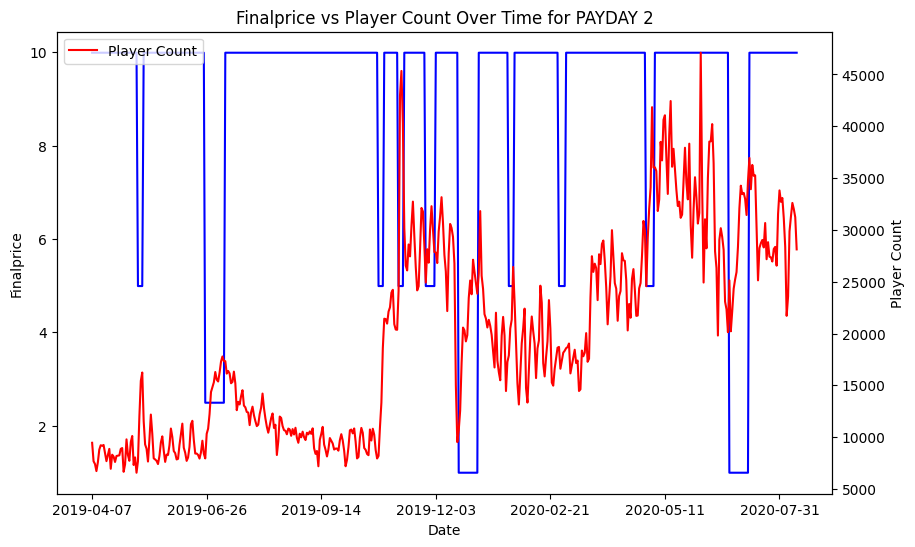

           Date  Initialprice  Finalprice  Discount  Playercount
0    2019-04-07         19.99       19.99         0        19107
1    2019-04-08         19.99       19.99         0        13646
2    2019-04-09         19.99       19.99         0        13950
3    2019-04-10         19.99       19.99         0        13638
4    2019-04-11         19.99       19.99         0        13674
..          ...           ...         ...       ...          ...
488  2020-08-08         19.99       19.99         0        16683
489  2020-08-09         19.99       19.99         0        17766
490  2020-08-10         19.99       19.99         0        15119
491  2020-08-11         19.99       19.99         0        14841
492  2020-08-12         19.99       19.99         0        14441

[493 rows x 5 columns]


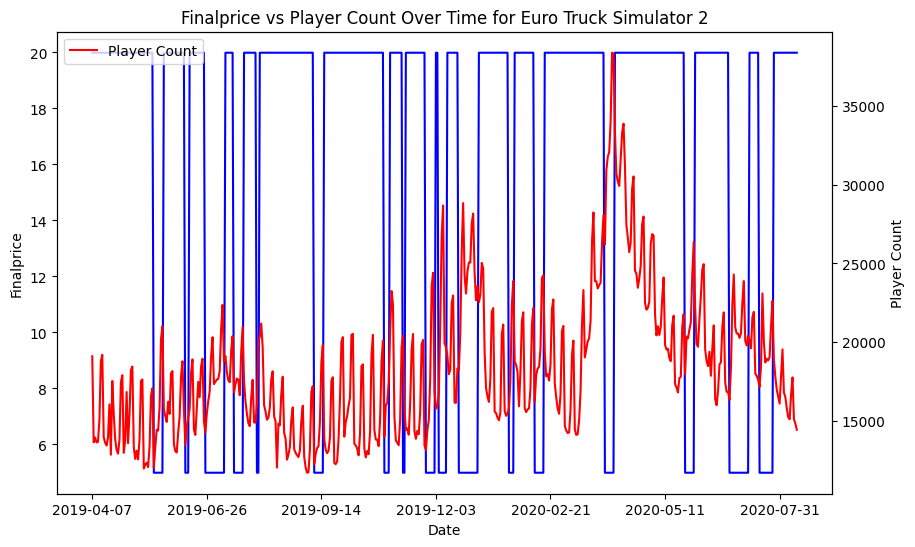

           Date  Initialprice  Finalprice  Discount  Playercount
0    2019-04-07         39.99       39.99         0        17665
1    2019-04-08         39.99       39.99         0        12887
2    2019-04-09         39.99       39.99         0        12530
3    2019-04-10         39.99       39.99         0        12170
4    2019-04-11         39.99       39.99         0        12216
..          ...           ...         ...       ...          ...
488  2020-08-08         29.99       29.99         0        14525
489  2020-08-09         29.99       29.99         0        14985
490  2020-08-10         29.99       29.99         0        12603
491  2020-08-11         29.99       29.99         0        12306
492  2020-08-12         29.99       29.99         0        12097

[493 rows x 5 columns]


KeyboardInterrupt: 

In [57]:
#loop over all appid in appMergedInfo
    #use appid to get PriceHistory and PlayerCountHistory
    #create graph of PriceHistory and PlayerCountHistory over Time (1-day intervals)
countDirTemplate = "data/NormalizedPlayerCountHistory/"
priceDirTemplate = "data/PriceHistory/"
for appid in appMergedInfo['appid']:
    appid_string = str(appid) + ".csv"
    countDir = os.path.join(countDirTemplate, appid_string)
    priceDir = os.path.join(priceDirTemplate, appid_string)
    if os.path.exists(countDir) and os.path.exists(priceDir):
        countData = pd.read_csv(countDir)
        priceData = pd.read_csv(priceDir)
        mergedData = priceData.merge(countData, on='Date')
        print(mergedData)

        title = appMergedInfo.loc[appMergedInfo['appid'] == appid, 'name'].values[0]
        
        # Plot "Finalprice" vs "Playercount"
        fig, ax1 = plt.subplots(figsize=(10, 6))
        ax1.plot(mergedData['Date'], mergedData['Finalprice'], label='Finalprice', color='b')
        ax1.set_xlabel('Date')
        ax1.set_ylabel('Finalprice')
        
        ax2 = ax1.twinx()
        ax2.plot(mergedData['Date'], mergedData['Playercount'], label='Player Count', color='r')
        ax2.set_ylabel('Player Count')

        # Set labels and title
        plt.title('Finalprice vs Player Count Over Time for ' + title)

        # Configure x-axis date ticks on a monthly basis
        ax1.xaxis.set_major_locator(MaxNLocator(nbins=8))
        
        # Display the legend
        plt.legend(loc='upper left')

        # Show the plot
        plt.show()





    